# Interpolacja 

### Zadanie 1
Stablicuj następujące funkcje: sqrt(x), sin(x), x^3+2x w czterech punktach należących do przedziału 0 do 10.

In [34]:
import math
import numpy as np
import sympy
from tabulate import tabulate
import matplotlib.pyplot as plt

def func_to_table(min, max, num_of_point, func, name_func):
    table = []
    x_array = []
    y_array = []
    step = (max - min) / num_of_point
    for i in np.arange(min, max+step, step):
        table.append([name_func, i, func(i)])
        x_array.append(i)
        y_array.append(func(i))
    print(tabulate(table, headers=['L.P.', 'x', 'f(x)'], tablefmt="fancy_grid", floatfmt=".10f"))
    return x_array, y_array


f = lambda x: pow(x, 3) + 2 * x
sqrt_x_array, sqrt_y_array = func_to_table(0, 10, 4, math.sqrt, "sqrt(x)")
f_x_array, f_y_array = func_to_table(0, 10, 4, f, "x^3 + 2*x")
sin_x_array, sin_y_array =func_to_table(0, 10, 4, math.sin, "sin(x)")
pass

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  2.5000000000 │ 1.5811388301 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  5.0000000000 │ 2.2360679775 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  7.5000000000 │ 2.7386127875 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │ 10.0000000000 │ 3.1622776602 │
╘═════════╧═══════════════╧══════════════╛
╒═══════════╤═══════════════╤═════════════════╕
│ L.P.      │             x │            f(x) │
╞═══════════╪═══════════════╪═════════════════╡
│ x^3 + 2*x │  0.0000000000 │    0.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  2.5000000000 │   20.6250000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  5.0000000000 │  135.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2

### Zadanie 2 
Napisz algorytm znajdujący wielomian interpolujący Lagrange dla powyższych stablicowanych funkcji.

**Interpolacja Lagrange’a**, nazywana też interpolacją wielomianowa, od nazwiska pioniera badań nad interpolacją Josepha Lagrange’a lub po prostu interpolacją – metoda numeryczna przybliżania funkcji tzw. wielomianem Lagrange’a stopnia **n** przyjmującym w **n+1** punktach, zwanych węzłami interpolacji, wartości takie same jak przybliżana funkcja. 
                    
Postać Lagrange’a wielomianu to jedna z metod przedstawiania wielomianu, wykorzystywana często w zagadnieniach interpolacji. Dla wielomianu stopnia n wybiera się n+1 punktów – x0, x1, ... ,xn  i wielomian ma postać:                                             
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/a8f4df5cd2a0ad323ad04c5365a8d9f9d3b24c18)


In [35]:
def lagrange_interpolation(x_array, y_array):
    X = sympy.symbols('x')
    if len(x_array) != len(y_array):
        print("ERROR")
        return 1
    y = 0
    for k in range(len(x_array)):
        i = 1
        for j in range(len(x_array)):
            if j != k:
                i = i*((X-x_array[j])/(x_array[k]-x_array[j]))
        y += i*y_array[k]
    return sympy.simplify(y)


output = [['sqrt(x)', lagrange_interpolation(sqrt_x_array, sqrt_y_array)],
         ['x^3 + 2*x', lagrange_interpolation(sin_x_array, sin_y_array)],
         ['sin(x)', lagrange_interpolation(f_x_array, f_y_array)]]

print(tabulate(output, headers=['L.P.', 'Lagrange interpolation polynomial'], tablefmt="fancy_grid", floatfmt=".10f"))

╒═══════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════╕
│ L.P.      │ Lagrange interpolation polynomial                                                                 │
╞═══════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════╡
│ sqrt(x)   │ x*(-0.000747009008291161*x**3 + 0.019459272140677*x**2 - 0.187359671555827*x + 0.990906275798561) │
├───────────┼───────────────────────────────────────────────────────────────────────────────────────────────────┤
│ x^3 + 2*x │ x*(-0.0132730189252085*x**3 + 0.258937302364272*x**2 - 1.53380467478385*x + 2.66293332553089)     │
├───────────┼───────────────────────────────────────────────────────────────────────────────────────────────────┤
│ sin(x)    │ x*(-8.88178419700125e-16*x**3 + 1.0*x**2 - 5.6843418860808e-14*x + 2.00000000000006)              │
╘═══════════╧═══════════════════════════════════════════════════════════════════════════

### Zadanie 3
Porównaj wartość dokładną z wynikiem interpolacji dla punktów znajdujących się pomiędzy węzłami wielomianu (w połowie odległości) interpolującego. Oszacuj dokładność interpolacji. 


╒══════════════╤══════════════╤═════════════════════════╤══════════════════╕
│            x │      sqrt(x) │   interpolation sqrt(x) │   relative error │
╞══════════════╪══════════════╪═════════════════════════╪══════════════════╡
│ 1.2500000000 │ 1.1180339887 │            0.9820659964 │     0.1216134695 │
├──────────────┼──────────────┼─────────────────────────┼──────────────────┤
│ 3.7500000000 │ 1.9364916731 │            1.9596017579 │     0.0119339965 │
├──────────────┼──────────────┼─────────────────────────┼──────────────────┤
│ 6.2500000000 │ 2.5000000000 │            2.4853806275 │     0.0058477490 │
├──────────────┼──────────────┼─────────────────────────┼──────────────────┤
│ 8.7500000000 │ 2.9580398915 │            2.9830674779 │     0.0084608685 │
╘══════════════╧══════════════╧═════════════════════════╧══════════════════╛
╒══════════════╤═══════════════╤════════════════════════╤══════════════════╕
│            x │        sin(x) │   interpolation sin(x) │   relative error │

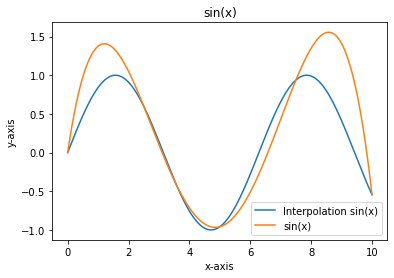

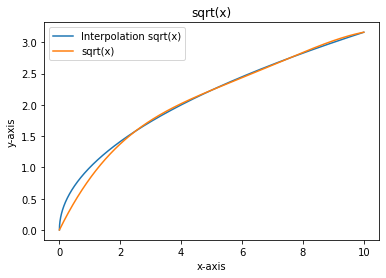

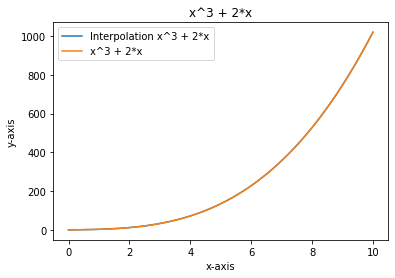

In [36]:
def lagrange_interpolation_solve(x_array, y_array, x):
    if len(x_array) != len(y_array):
        print("ERROR")
        return 1
    y = 0
    for k in range(len(x_array)):
        t = 1
        for j in range(len(x_array)):
            if j != k:
                t = t*((x-x_array[j])/(x_array[k]-x_array[j]))
        y += t*y_array[k]
    return sympy.simplify(y)


interpolation_sqrt_func = lambda x: lagrange_interpolation_solve(sqrt_x_array, sqrt_y_array, x)
interpolation_sin_func = lambda x: lagrange_interpolation_solve(sin_x_array, sin_y_array, x)
interpolation_f_func = lambda x: lagrange_interpolation_solve(f_x_array, f_y_array, x)


def compare_charts(min, max, num_of_point, func1, func2, func_name):
    x_array = []
    func1_array = []
    func2_array = []
    step = (max - min) / num_of_point
    for i in np.arange(min, max+step, step):
        x_array.append(i)
        func1_array.append(func1(i))
        func2_array.append(func2(i))

    plt.plot(x_array, func1_array, label="Interpolation "+func_name)
    plt.plot(x_array, func2_array, label=func_name)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title(func_name)
    plt.legend()
    plt.show()


def compare_results(min, max, num_of_point, func1, func2 ,  name_func):
    table = []
    step = (max - min) / num_of_point
    for i in np.arange(min+(step/2), max+(step/2), step):
        table.append([i, func1(i), func2(i), abs(func2(i)-func1(i))/abs(func1(i))])
    print(tabulate(table, headers=['x', name_func, 'interpolation '+name_func, 'relative error'], tablefmt="fancy_grid", floatfmt=".10f"))


compare_results(0, 10, 4, math.sqrt, interpolation_sqrt_func , "sqrt(x)")
compare_results(0, 10, 4, math.sin, interpolation_sin_func , "sin(x)")
compare_results(0, 10, 4, f, interpolation_f_func , "f(x)")

compare_charts(0, 10, 10000, math.sin, interpolation_sin_func, "sin(x)")
compare_charts(0, 10, 10000, math.sqrt, interpolation_sqrt_func, "sqrt(x)")
compare_charts(0, 10, 10000, f, interpolation_f_func, "x^3 + 2*x")
pass

### Zadanie 4
Powtórz powyższe kroki dla 3, 5 i 8 węzłów interpolacji - podsumuj badania. 

In [0]:
def interpolotion_for_n_points(min, max, num_of_point):
    f = lambda x: pow(x, 3) + 2 * x
    sqrt_x_array, sqrt_y_array = func_to_table(min, max, num_of_point, math.sqrt, "sqrt(x)")
    f_x_array, f_y_array = func_to_table(min, max, num_of_point, f, "x^3 + 2*x")
    sin_x_array, sin_y_array = func_to_table(min, max, num_of_point, math.sin, "sin(x)")

    output = [['sqrt(x)', lagrange_interpolation(sqrt_x_array, sqrt_y_array)],
              ['x^3 + 2*x', lagrange_interpolation(sin_x_array, sin_y_array)],
              ['sin(x)', lagrange_interpolation(f_x_array, f_y_array)]]
    print(tabulate(output, headers=['L.P.', 'Lagrange interpolation'], tablefmt="fancy_grid", floatfmt=".10f"))

    interpolation_sqrt_func = lambda x: lagrange_interpolation_solve(sqrt_x_array, sqrt_y_array, x)
    interpolation_sin_func = lambda x: lagrange_interpolation_solve(sin_x_array, sin_y_array, x)
    interpolation_f_func = lambda x: lagrange_interpolation_solve(f_x_array, f_y_array, x)

    compare_results(min, max, num_of_point, math.sqrt, interpolation_sqrt_func, "sqrt(x)")
    compare_results(min, max, num_of_point, math.sin, interpolation_sin_func, "sin(x)")
    compare_results(min, max, num_of_point, f, interpolation_f_func, "f(x)")

    compare_charts(min, max, 10000, math.sin, interpolation_sin_func, "sin(x)")
    compare_charts(min, max, 10000, math.sqrt, interpolation_sqrt_func, "sqrt(x)")
    compare_charts(min, max, 10000, f, interpolation_f_func, "x^3 + 2*x")



Interpolacja dla 3 węzłów : 

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  3.3333333333 │ 1.8257418584 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  6.6666666667 │ 2.5819888975 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │ 10.0000000000 │ 3.1622776602 │
╘═════════╧═══════════════╧══════════════╛
╒═══════════╤═══════════════╤═════════════════╕
│ L.P.      │             x │            f(x) │
╞═══════════╪═══════════════╪═════════════════╡
│ x^3 + 2*x │  0.0000000000 │    0.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  3.3333333333 │   43.7037037037 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  6.6666666667 │  309.6296296296 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │ 10.0000000000 │ 1020.0000000000 │
╘═══════════╧═══════════════╧═════════════════╛

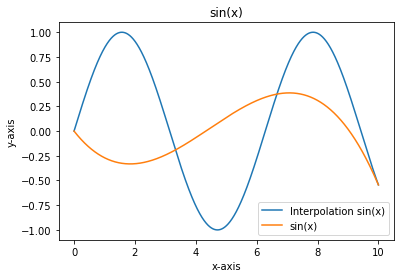

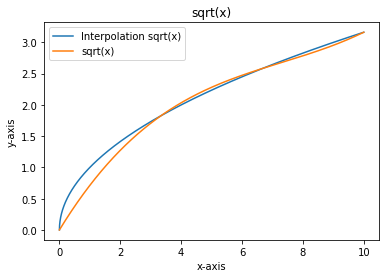

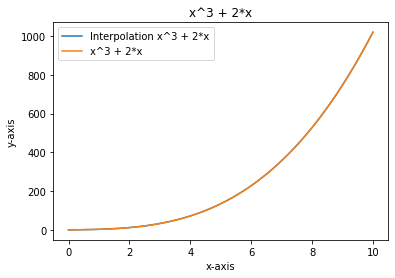

In [38]:
interpolotion_for_n_points(0, 10, 3)

Interpolacja dla 5 węzłów :

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  2.0000000000 │ 1.4142135624 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  4.0000000000 │ 2.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  6.0000000000 │ 2.4494897428 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  8.0000000000 │ 2.8284271247 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │ 10.0000000000 │ 3.1622776602 │
╘═════════╧═══════════════╧══════════════╛
╒═══════════╤═══════════════╤═════════════════╕
│ L.P.      │             x │            f(x) │
╞═══════════╪═══════════════╪═════════════════╡
│ x^3 + 2*x │  0.0000000000 │    0.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  2.0000000000 │   12.0000000000 │
├───────────┼───────────────┼─────────────────┤
│ x^3 + 2*x │  4.00

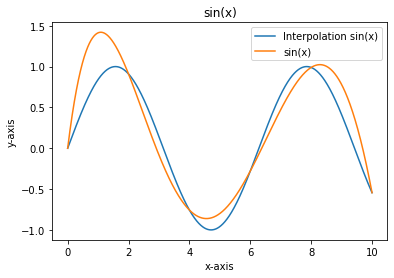

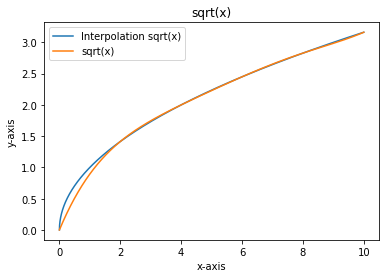

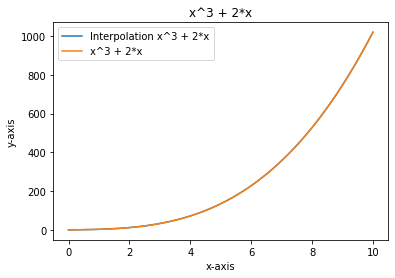

In [39]:
interpolotion_for_n_points(0, 10, 5)

Interpolacja dla 8 węzłów :

╒═════════╤═══════════════╤══════════════╕
│ L.P.    │             x │         f(x) │
╞═════════╪═══════════════╪══════════════╡
│ sqrt(x) │  0.0000000000 │ 0.0000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  1.2500000000 │ 1.1180339887 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  2.5000000000 │ 1.5811388301 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  3.7500000000 │ 1.9364916731 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  5.0000000000 │ 2.2360679775 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  6.2500000000 │ 2.5000000000 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  7.5000000000 │ 2.7386127875 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │  8.7500000000 │ 2.9580398915 │
├─────────┼───────────────┼──────────────┤
│ sqrt(x) │ 10.0000000000 │ 3.1622776602 │
╘═════════╧═══════════════╧══════════════╛
╒═══════════╤═══════════════╤═════════════════╕
│ L.P.      │             x │            f(x) │
╞

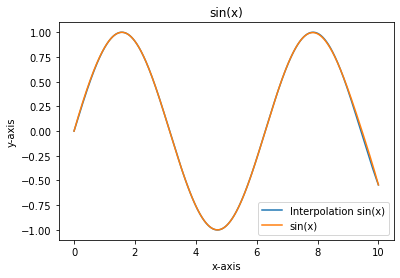

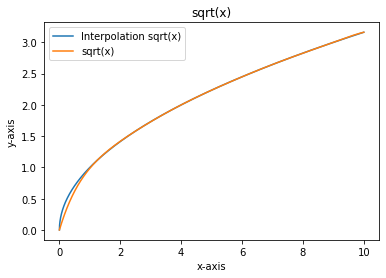

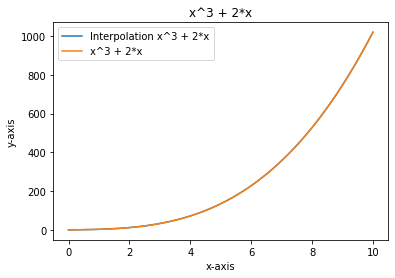

In [40]:
interpolotion_for_n_points(0, 10, 8)

Z powyższych tabeli wynika, że im więcej węzłów interpolacji tym mniejszy jest błąd (funkcja interpolująca bardziej odzwierciedla prawdziwą funkcje, widimy to na powyższych wykresach)